**Import the Libraries**


In [52]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns



**Load the Dataset**

In [ ]:
x = "weather_data.csv"

df = pd.read_csv(x)



**Inspect the Dataset**

In [ ]:
# Display the first five rows of the Dataset

print(df.head())



   ghi  dhi  precip        timestamp_utc  temp  app_temp  dni  snow_depth  \
0    0    0     0.0  2025-01-15T12:00:00  25.9      18.7    0           0   
1  385   87     0.0  2025-01-15T15:00:00  29.3      22.8  748           0   
2  542  101     0.0  2025-01-15T18:00:00  36.5      32.0  831           0   
3  193   65     0.0  2025-01-15T21:00:00  38.3      35.6  581           0   
4    0    0     0.0  2025-01-16T00:00:00  29.3      27.5    0           0   

  wind_cdir  rh  ... clouds_mid  wind_dir  snow  clouds_low  solar_rad  \
0       NNW  51  ...          0       350     0           0    0.00000   
1       NNW  41  ...          0       360     0           0  384.62994   
2       NNW  30  ...          0       340     0           0  542.37920   
3        NW  28  ...          0       310     0           0  192.98000   
4         W  46  ...          0       280     0           0    0.00000   

   wind_gust_spd      timestamp_local description(output)  code  icon  
0           11.9  20

In [ ]:
# Check the data types of each column

print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ghi                  40 non-null     int64  
 1   dhi                  40 non-null     int64  
 2   precip               40 non-null     float64
 3   timestamp_utc        40 non-null     object 
 4   temp                 40 non-null     float64
 5   app_temp             40 non-null     float64
 6   dni                  40 non-null     int64  
 7   snow_depth           40 non-null     int64  
 8   wind_cdir            40 non-null     object 
 9   rh                   40 non-null     int64  
 10  pod                  40 non-null     object 
 11  pop                  40 non-null     int64  
 12  ozone                40 non-null     int64  
 13  clouds_hi            40 non-null     int64  
 14  clouds               40 non-null     int64  
 15  vis                  40 non-null     float

In [ ]:
# Convert Date into a proper datetime format

df['timestamp_utc'] = pd.to_datetime(df['timestamp_utc'], format ='%Y-%m-%dT%H:%M:%S')

df['timestamp_local'] = pd.to_datetime(df['timestamp_local'], format ='%Y-%m-%dT%H:%M:%S')

df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%d:%H')



**Feature Engineering**

In [ ]:
# Extract the Year, Month and Data and create new columns

df['Year'] = df['datetime'].dt.year

df['Month'] = df['datetime'].dt.month

df['Day'] = df['datetime'].dt.day



In [ ]:
# Check the new columns

print(df['Year'].head(3))

print(df['Month'].head(3))

print(df['Day'].head(3))



0    2025
1    2025
2    2025
Name: Year, dtype: int32
0    1
1    1
2    1
Name: Month, dtype: int32
0    15
1    15
2    15
Name: Day, dtype: int32


**Handling Null Values**

In [ ]:
# Checking the null values in the Dataset

print(df.isnull().sum())



ghi                    0
dhi                    0
precip                 0
timestamp_utc          0
temp                   0
app_temp               0
dni                    0
snow_depth             0
wind_cdir              0
rh                     0
pod                    0
pop                    0
ozone                  0
clouds_hi              0
clouds                 0
vis                    0
wind_spd               0
wind_cdir_full         0
slp                    0
datetime               0
ts                     0
pres                   0
dewpt                  0
uv                     0
clouds_mid             0
wind_dir               0
snow                   0
clouds_low             0
solar_rad              0
wind_gust_spd          0
timestamp_local        0
description(output)    0
code                   0
icon                   0
Year                   0
Month                  0
Day                    0
dtype: int64


**Calculate basic statistics (mean, median, mode) for  Temperature, Humidity and Wind Speed**


In [ ]:
print(df[['temp', 'rh', 'wind_spd']].agg(['mean', 'median', lambda x: x.mode()[0]]))



          temp     rh  wind_spd
mean      37.2   69.8     3.795
median    37.6   75.5     3.600
<lambda>  29.3  100.0     3.600


**Day with the Highest Temperature Recorded**

In [ ]:
# Find the maximum temperature

max_temp = df['temp'].max()

print(max_temp)



50.2


In [ ]:
# Find the day with the maximum temperature

maxtemp_day = df[df['temp'] == max_temp]['Day'].iloc[0]

print(maxtemp_day)



19


**Identify the most frequent Weather Condition in the dataset**

In [ ]:
# Get the most frequent weather condition

most_frq_weather = df['description(output)'].mode()[0]

print("Most frequent weather condition: ", most_frq_weather)



Most frequent weather condition:  Few clouds


In [ ]:
# Get the count of most frequent weather condition

count = df['description(output)'].value_counts()[most_frq_weather]

print("Count: ", count)



Count:  18


**Count the number of Clear Sky and Drizzle days**

In [ ]:
# Count of 'Clear Sky' Days

count_sunny = df['description(output)'].value_counts()['Clear Sky']

print(f"Count of 'Clear Sky' days: {count_sunny}")



Count of 'Clear Sky' days: 3


In [ ]:
# Count of 'Drizzle' Days

count_drizzle = df['description(output)'].value_counts()['Drizzle']

print(f"Count of 'Drizzle' Days: {count_drizzle}")



Count of 'Drizzle' Days: 2


**Average wind speed on 'Light shower rain' day**

In [ ]:
# Filter out the Light Shower Rain days

rain_day = df[df['description(output)'] == 'Light shower rain']



In [ ]:
# Calculate average wind speed on rainy day

avg_speed = rain_day['wind_spd'].mean()

print(f"Average wind speed on 'Light shower rain' day is: {avg_speed}")



Average wind speed on 'Light shower rain' day is: 1.8


**Filter out records where the temperature was below 30°C**

In [ ]:
# Filter records where temperature is below 20°C

temp_below_20 = df[df['temp'] < 30]


# Get the count of records

count = temp_below_20['temp'].count()


print(f"Records where the temperature was below 30°C is {count}")



Records where the temperature was below 30°C is 9


**Plot a histogram of Temperature**

<function matplotlib.pyplot.show(close=None, block=None)>

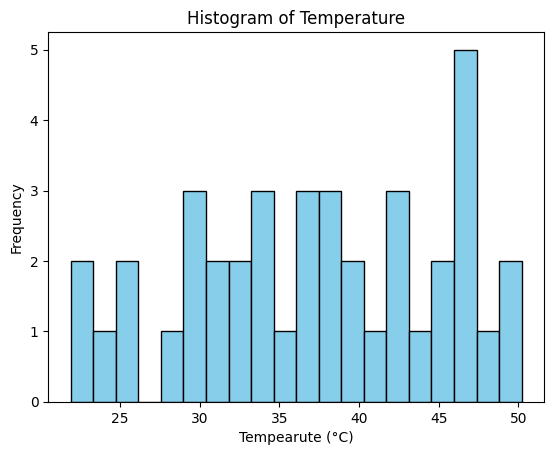

In [53]:
plt.hist(df['temp'], bins = 20, color = 'skyblue', edgecolor = 'black')

plt.xlabel('Tempearute (°C)')

plt.ylabel('Frequency')

plt.title('Histogram of Temperature')

plt.show



**Create a Scatter Plot of Temperature vs. Humidity**

<function matplotlib.pyplot.show(close=None, block=None)>

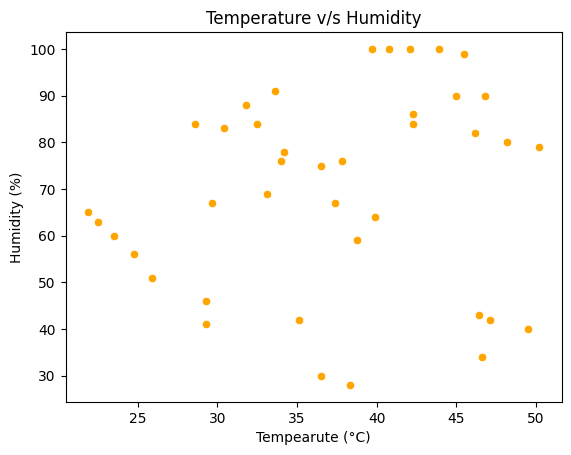

In [55]:
sns.scatterplot(x = 'temp', y = 'rh', data = df, color = 'orange')

plt.xlabel('Tempearute (°C)')

plt.ylabel('Humidity (%)')

plt.title('Temperature v/s Humidity')

plt.show



**Create a Line Plot of Temperature Over Time**

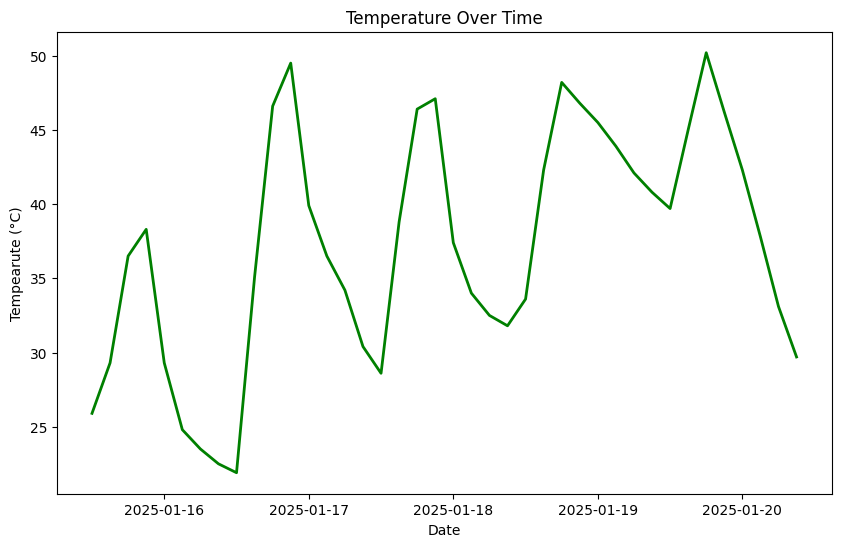

In [57]:
plt.figure(figsize = (10,6))

plt.plot(df['timestamp_utc'], df['temp'], color = 'green', linewidth = 2)

plt.xlabel('Date')

plt.ylabel('Tempearute (°C)')

plt.title('Temperature Over Time')

plt.show()



**Create a Bar Plot Showing Number of Days per Weather Condition**

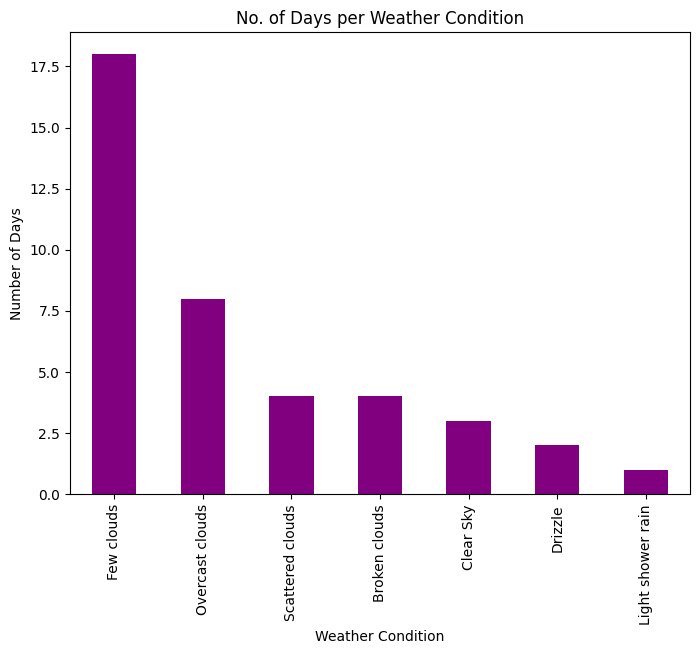

In [59]:
weather_count = df['description(output)'].value_counts()

plt.figure(figsize = (8,6))

weather_count.plot(kind = 'bar', color = 'purple')

plt.xlabel('Weather Condition')

plt.ylabel('Number of Days')

plt.title('No. of Days per Weather Condition')

plt.show()



**Plot a Boxplot for Wind Speed to Detect Outliers**

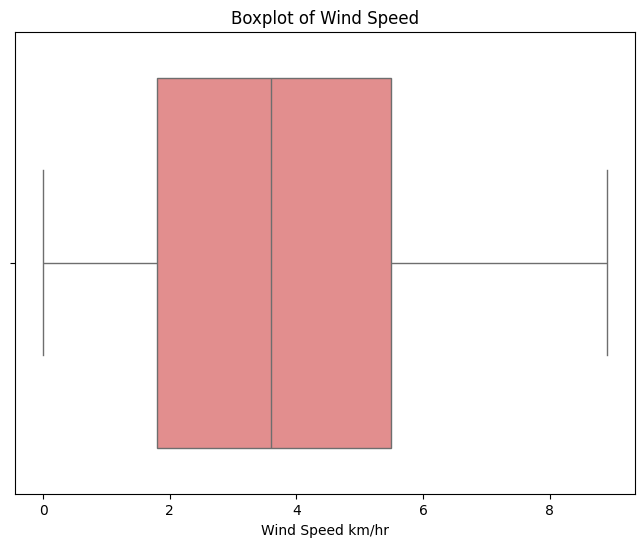

In [60]:
plt.figure(figsize = (8,6))

sns.boxplot(x = df['wind_spd'], color = 'lightcoral')

plt.xlabel('Wind Speed km/hr')

plt.title('Boxplot of Wind Speed')

plt.show()

